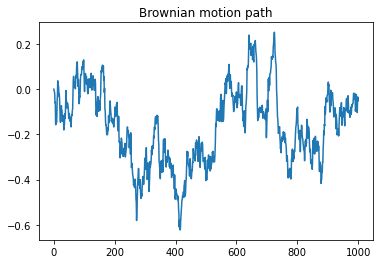

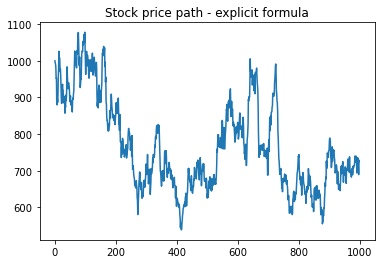

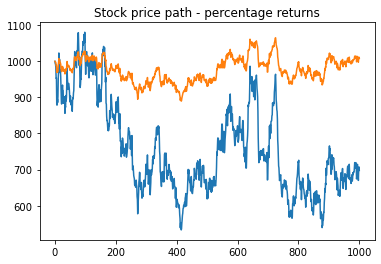

0.001
0.07061595303632343


In [29]:
import numpy as np
import matplotlib.pyplot as plt

T = 1 # terminal time
N = 1000 # numer of time steps
dt = T / N # length of one period
S0 = 1000 # initial stock price
mu = 0.03 # stock return rate
r = 0.01 # interest rate
sigma = 0.8 # volatility

mu3 = 0.04
sigma3 = 0.2

W = [0]
S1 = []
S2 = [S0]
S3 = [S0]

dW = np.random.normal(0, np.sqrt(dt), N) # Brownian motion differentials

for i in range(N):
    W.append(W[i] + dW[i])
    S1.append(S0*np.exp((mu - 0.5*sigma**2)*dt*i + sigma*W[i])) # stock price path using explicit formula
    S2.append(S2[i]+ S2[i]*(mu *dt + sigma*dW[i])) #  stock price path using percentage returns
    S3.append(S3[i]+ S3[i]*(mu3 *dt + sigma3*dW[i])) #  stock price path using percentage returns
    

p1 = plt.figure(1)
plt.plot(W)
plt.title('Brownian motion path')

p2 = plt.figure(2)
plt.plot(S1)
plt.title('Stock price path - explicit formula')
plt.show()

p3 = plt.figure(3)
plt.plot(S2)
plt.plot(S3)
plt.title('Stock price path - percentage returns')
plt.show()



In [25]:
from math import *
import numpy as np

def normcdf(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

def normpdf(x):
    return 1/sqrt(2*pi) * exp(- x**2/2)

def callBS(S,K,T, sigma, r):
    d_plus = ((r + 1/2 * sigma**2) * T - log(K/S))/ (sigma * sqrt(T) )
    d_minus = ((r - 1/2 * sigma**2) * T - log(K/S))/ (sigma * sqrt(T) )
    return S * normcdf(d_plus) - K * exp(-r*T) * normcdf(d_minus)

# Set values for parameters

S_0 = 110
mu = 0.05
sigma = 0.2
T = 1
r = 0.02;

N = 10000000 # number of simulations
W_T = np.random.normal(0, np.sqrt(T), N)
S_T = S0*np.exp((r - 1/2*sigma**2)*T + sigma* W_T) 
print("Black-Scholes simulation price is ",  exp(-r*T)*np.sum(np.maximum(S_T - K, 0))/N)
print("Black-Scholes formula price is ", callBS(S0,K,T,sigma,r))

Black-Scholes simulation price is  0.11989701308019017
Black-Scholes formula price is  0.11970338656122692
